In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chisquare
from scipy.special import factorial
from scipy.stats import poisson

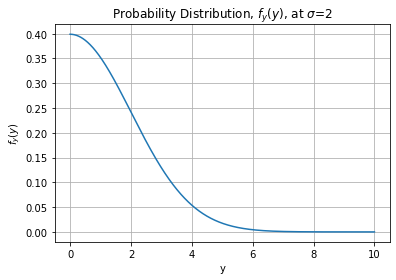

In [2]:
#1. See attached for derivation of the distribution functions. 

y = np.linspace(0,10,1000)
sigma = 2

def gauss(y):
    return np.exp(-y**2/(2*sigma**2))/((np.sqrt(2*np.pi*sigma**2)))   

plt.plot(y,2*gauss(y))
plt.title(r'Probability Distribution, $f_y(y)$, at $\sigma$=2')
plt.xlabel('y')
plt.ylabel('$f_y(y)$')
plt.grid()

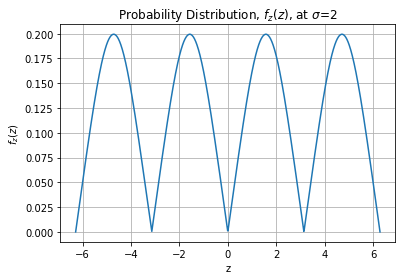

In [3]:
z = np.linspace(-2*np.pi,2*np.pi,1000)   # z array
#x = np.linspace(-10,10,1000)
#z = np.arccos(x)
def gauss2(z):
    return (np.abs(np.sin(z))/(np.sqrt(2*np.pi*sigma**2)))*np.exp(-(np.cos(z))**2/(2*sigma**2))  

plt.plot(z,gauss2(z))
plt.title(r'Probability Distribution, $f_z(z)$, at $\sigma$=2')
plt.xlabel('z')
plt.ylabel('$f_z(z)$')
plt.grid()

[Text(0, 0, '$-\\pi$'),
 Text(0, 0, '$-3\\pi/4$'),
 Text(0, 0, '$-\\pi/2$'),
 Text(0, 0, '$-\\pi/4$'),
 Text(0, 0, '$0$'),
 Text(0, 0, '$\\pi/4$'),
 Text(0, 0, '$\\pi/2$'),
 Text(0, 0, '$3\\pi/4$'),
 Text(0, 0, '$\\pi$')]

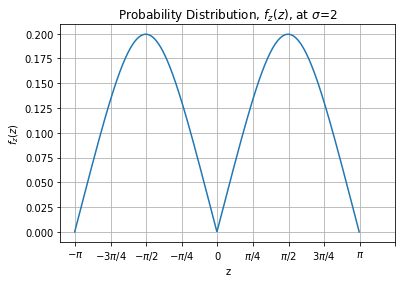

In [4]:
# from -pi to pi

z = np.linspace(-1*np.pi,np.pi,1000)

fig, ax = plt.subplots(1)

ax.plot(z,gauss2(z))
plt.title(r'Probability Distribution, $f_z(z)$, at $\sigma$=2')
plt.xlabel('z')
plt.ylabel('$f_z(z)$')
plt.grid()
ax.set_xticks(np.arange(-1*np.pi+0.01, np.pi+1, np.pi/4))
labels = [r'$-\pi$',r'$-3\pi/4$',r'$-\pi/2$',r'$-\pi/4$','$0$', r'$\pi/4$', r'$\pi/2$', r'$3\pi/4$', r'$\pi$']
ax.set_xticklabels(labels)

Fitted mean: 1.4557004046807795 and Estimated mean:  1.467


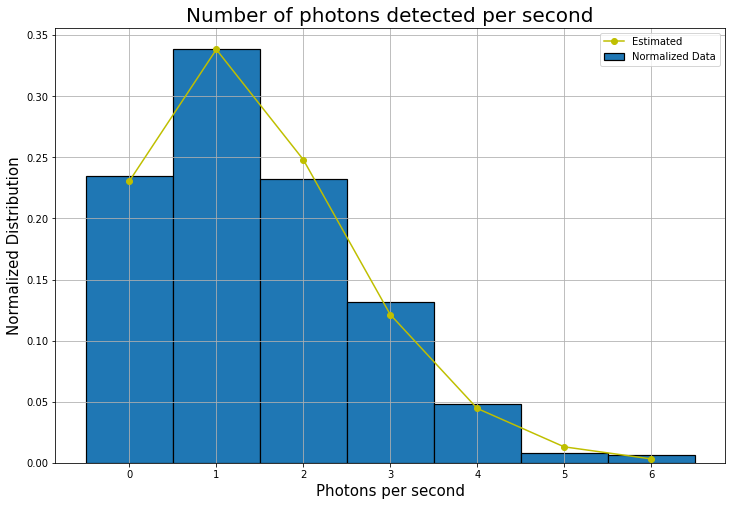

In [5]:
#3a

numPh = np.loadtxt("hw3_events.txt",skiprows=2)

plt.figure(figsize=(12,8))
bins = [0,1,2,3,4,5,6,7]

def poiss(k, a):
    return (a**k/factorial(k))*np.exp(-1*a)

histo = plt.hist(numPh, bins, density=True, align='left', edgecolor='black', linewidth=1.2,label='Normalized Data')

popt, pcov = curve_fit(poiss,bins[:-1],histo[0], p0=np.mean(numPh))    
print("Fitted mean:", popt[0], "and Estimated mean: ", np.mean(numPh))

plt.plot(bins[:-1], poisson.pmf(bins[:-1],np.mean(numPh)), 'yo-',label='Estimated')
#plt.plot(bins[:-1], poiss(bins[:-1],popt), 'ko-',label='Fitted')
plt.xlabel('Photons per second', fontsize=15)
plt.ylabel('Normalized Distribution',fontsize=15)
plt.title('Number of photons detected per second',fontsize=20)
plt.legend()
plt.grid()

For the estimation, I used the built in function from the stats package called poisson.pmf, which takes the number of bins in our case as well as the mean of the data for its calculation. As we can see, the estimated model matches the histogram very well. The corresponding points approximately match the max value of the bins  all the way to the end. Thus, this estimated poisson is a good match to the data. 

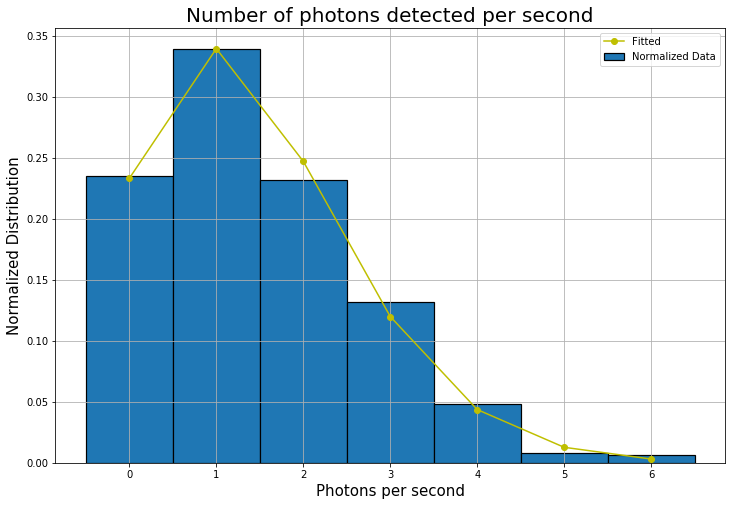

In [6]:
# 3b. Now plotting the fitted function to the model:

plt.figure(figsize=(12,8))
histo = plt.hist(numPh, bins, density=True, align='left', edgecolor='black', linewidth=1.2,label='Normalized Data')
plt.plot(bins[:-1], poiss(bins[:-1],popt), 'yo-',label='Fitted')
plt.xlabel('Photons per second', fontsize=15)
plt.ylabel('Normalized Distribution',fontsize=15)
plt.title('Number of photons detected per second',fontsize=20)
plt.legend()
plt.grid()

Using curvefit to fit the poisson distribution to the data gives us a very good fit as well. The fitted parameter was the mean, a, which is approximately 1.456 compared to the actual mean of 1.467. The best fit parameter is within 95% confidence interval which shows that the estimation and the curvefit are almost identical, which is evident from the plots above. This proves the fact that photon counts follow Poisson distributions, as expected. We can further overplot all of these to see any miniscule differences. 

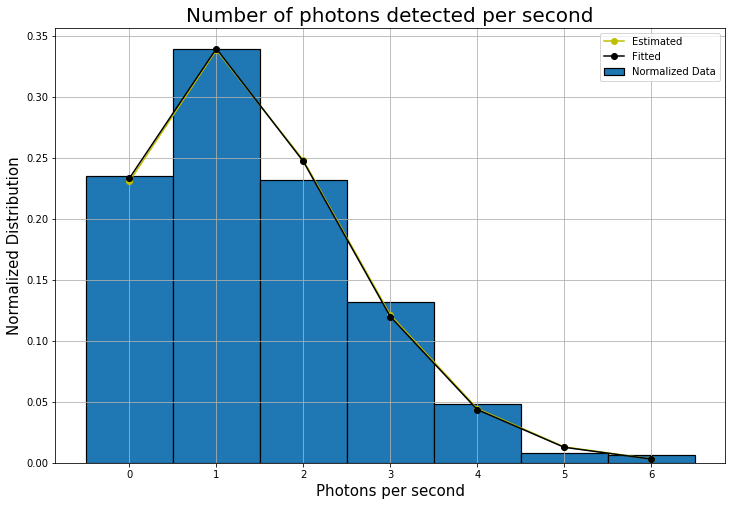

In [7]:
plt.figure(figsize=(12,8))
histo = plt.hist(numPh, bins, density=True, align='left', edgecolor='black', linewidth=1.2,label='Normalized Data')
plt.plot(bins[:-1], poisson.pmf(bins[:-1],np.mean(numPh)), 'yo-',label='Estimated')
plt.plot(bins[:-1], poiss(bins[:-1],popt), 'ko-',label='Fitted')
plt.xlabel('Photons per second', fontsize=15)
plt.ylabel('Normalized Distribution',fontsize=15)
plt.title('Number of photons detected per second',fontsize=20)
plt.legend()
plt.grid()

In [8]:
# 4

data0 = np.loadtxt("hw3_data_v0.txt",skiprows=3)
data1 = np.loadtxt("hw3_data_v1.txt",skiprows=3)

t0, x0 = data0[:,0], data0[:,1]
t1, x1 = data1[:,0], data1[:,1]
noise0,noise1 = 2,0.2
ydata0 = x0
ydata1 = x1

def func(t, a1, b1):
    return a1 + b1*t

def func2(t,a2,b2,c2):
    return a2 + b2*t + c2*np.sin(2*np.pi*t/50)

popt0, pcov0 = curve_fit(func, t0, ydata0)
popt1, pcov1 = curve_fit(func2, t0, ydata0)

fit1 = func(t0, *popt0)
fit2 = func2(t0, *popt1)

print("Best fit parameters of y1(t): ", popt0)
print("Best fit parameters of y2(t): ", popt1)

print("\nParameter covariance of y1(t): ", pcov0)
print("\nParameter covariance of y2(t): ", pcov1)

mean_fit1 = np.mean(fit1)
mean_fit2 = np.mean(fit2)

std_fit1 = np.std(fit1)
std_fit2 = np.std(fit2)

print("\nMean of y1(t): ", mean_fit1)
print("Mean of y2(t): ", mean_fit2)

print("\nStandard deviation of y1(t): ", std_fit1)
print("Standard deviation of y2(t): ", std_fit2)

#chisq1 = chisquare(ydata0,fit1)
#chisq2 = chisquare(ydata0,fit2)

#print("\nChisquare y1(t): ",chisq1)
#print("Chisquare y2(t): ",chisq2)

chisqCalc1 = np.sum(((ydata0-fit1)/2)**2)
chisqCalc2 = np.sum(((ydata0-fit2)/2)**2)

print('\nchi^2 of the fit1:', chisqCalc1)  #is it (observed - expected)/expected, or (O-E)/std
#print('Expected chi^2 mean, std.:', len(t0)-2, np.sqrt(2*(len(t0)-2)))

print('chi^2 of the fit2:', chisqCalc2)
#print('Expected chi^2 mean, std.:', len(t0)-3, np.sqrt(2*(len(t0)-3)))

reduction = chisqCalc1 - chisqCalc2
print("\nReduction in chi^2:", reduction, ".This corresponds to", np.sqrt(reduction), "sigma better than model 1.")
print("Thus, Model 2 is slightly favored Model 1.")

Best fit parameters of y1(t):  [5.08851564e+01 1.34761536e-03]
Best fit parameters of y2(t):  [ 5.08903989e+01  1.33713025e-03 -1.10274922e-01]

Parameter covariance of y1(t):  [[ 1.48683588e-02 -2.22913923e-05]
 [-2.22913923e-05  4.45827843e-08]]

Parameter covariance of y2(t):  [[ 1.48758436e-02 -2.23110563e-05 -3.54623904e-04]
 [-2.23110563e-05  4.46221129e-08  7.09247491e-07]
 [-3.54623904e-04  7.09247491e-07  7.45933737e-03]]

Mean of y1(t):  51.558964034983205
Mean of y2(t):  51.55896403596404

Standard deviation of y1(t):  0.3894118754556974
Standard deviation of y2(t):  0.39712295357052985

chi^2 of the fit1: 930.6646949649295
chi^2 of the fit2: 929.1469246160184

Reduction in chi^2: 1.5177703489110854 .This corresponds to 1.2319782258266927 sigma better than model 1.
Thus, Model 2 is slightly favored Model 1.


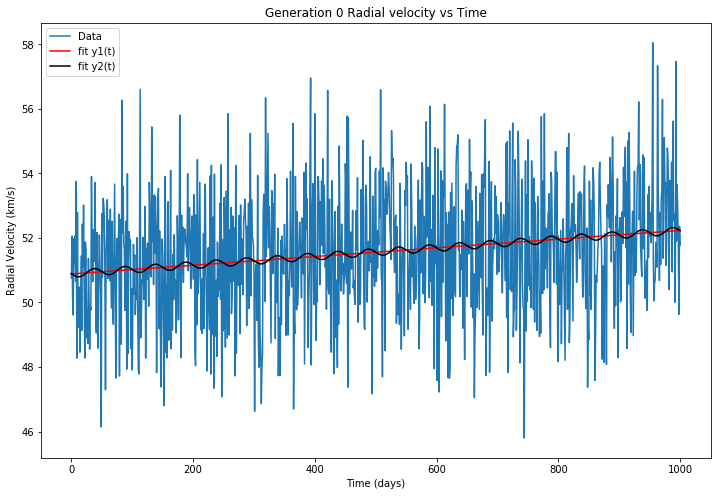

In [9]:
plt.figure(figsize=(12,8))
plt.plot(t0,ydata0,label="Data")
plt.plot(t0, fit1,'r-',label="fit y1(t)")
plt.plot(t0, fit2,'k-',label="fit y2(t)")
plt.xlabel("Time (days)")
plt.ylabel("Radial Velocity (km/s)")
plt.title("Generation 0 Radial velocity vs Time")
plt.legend()

In [10]:
popt0, pcov0 = curve_fit(func, t1, ydata1)
popt1, pcov1 = curve_fit(func2, t1, ydata1)

print("Best fit parameters of y1(t): ", popt0)
print("Best fit parameters of y2(t): ", popt1)

print("\nParameter covariance of y1(t): ", pcov0)
print("\nParameter covariance of y2(t): ", pcov1)

fit1 = func(t1, *popt0)
fit2 = func2(t1, *popt1)

mean_fit1 = np.mean(fit1)
mean_fit2 = np.mean(fit2)

std_fit1 = np.std(fit1)
std_fit2 = np.std(fit2)

print("\nMean of y1(t): ", mean_fit1)
print("Mean of y2(t): ", mean_fit2)

print("\nStandard deviation of y1(t): ", std_fit1)
print("Standard deviation of y2(t): ", std_fit2)

#chisq1 = chisquare(ydata1,fit1)
#chisq2 = chisquare(ydata1,fit2)

#print("\nChisquare y1(t): ",chisq1)
#print("Chisquare y2(t): ",chisq2)

chisqCalc1 = np.sum(((ydata1-fit1)/0.2)**2)
chisqCalc2 = np.sum(((ydata1-fit2)/0.2)**2)

print('\nchi^2 of the fit1:', chisqCalc1)
#print('Expected chi^2 mean, std.:', len(t0)-2, np.sqrt(2*(len(t0)-2)))

print('chi^2 of the fit2:',chisqCalc2)
#print('Expected chi^2 mean, std.:', len(t0)-3, np.sqrt(2*(len(t0)-3)))

reduction = chisqCalc1 - chisqCalc2
print("\nReduction in chi^2:", reduction, ".This corresponds to", np.sqrt(reduction), "sigma better than model 1.")
print("Thus, Model 2 is favored over Model 1 a lot.")

Best fit parameters of y1(t):  [5.10475538e+01 9.82019829e-04]
Best fit parameters of y2(t):  [5.10354390e+01 9.86865775e-04 5.09661886e-02]

Parameter covariance of y1(t):  [[ 3.09288838e-03 -1.22084487e-06]
 [-1.22084487e-06  4.88337954e-10]]

Parameter covariance of y2(t):  [[ 3.00200231e-03 -1.18499333e-06 -1.88349440e-05]
 [-1.18499333e-06  4.73997331e-10  7.53397636e-09]
 [-1.88349440e-05  7.53397636e-09  7.92370143e-05]]

Mean of y1(t):  53.5026033966034
Mean of y2(t):  53.50260339658361

Standard deviation of y1(t):  0.28376804930908167
Standard deviation of y2(t):  0.2860416433497597

chi^2 of the fit1: 1019.4044528400586
chi^2 of the fit2: 986.984114255556

Reduction in chi^2: 32.42033858450259 .This corresponds to 5.693886070558717 sigma better than model 1.
Thus, Model 2 is favored over Model 1 a lot.


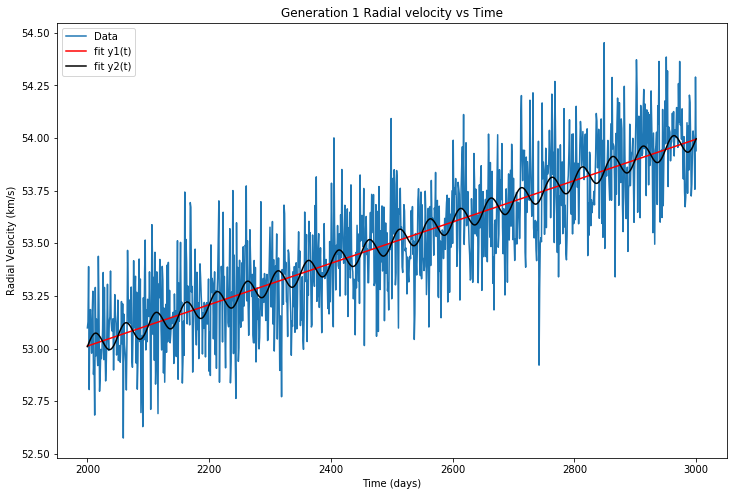

In [11]:
plt.figure(figsize=(12,8))
plt.plot(t1,ydata1,label="Data")
plt.plot(t1, fit1,'r-',label="fit y1(t)")
plt.plot(t1, fit2,'k-',label="fit y2(t)")
plt.xlabel("Time (days)")
plt.ylabel("Radial Velocity (km/s)")
plt.title("Generation 1 Radial velocity vs Time")
plt.legend()